In [13]:
import pandas_datareader.data as web
import yfinance as yf
import datetime
import time
import pandas as pd
from selenium import webdriver
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import random

In [14]:
yf.pdr_override()
start = datetime.datetime(2009, 1, 1)
end = datetime.datetime(2022, 11, 1)

df_ibov = web.get_data_yahoo('^BVSP',start,end)

df_ibov.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-25,116016.0,116203.0,114626.0,114626.0,114626.0,14727200
2022-10-26,114626.0,114626.0,112577.0,112764.0,112764.0,16088200
2022-10-27,112766.0,116236.0,112765.0,114641.0,114641.0,15530800
2022-10-28,114636.0,114712.0,113336.0,114539.0,114539.0,14392400
2022-10-31,114533.0,116763.0,112113.0,116037.0,116037.0,21637900


In [15]:
options = webdriver.ChromeOptions()
prefs ={"download.default_directory":"Users/juliocarvalho/Downloads/"}

options.add_experimental_option("prefs",prefs)
driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=options)
driver.get ("https://sistemaswebb3-listados.b3.com.br/indexPage/day/IBOV?language=pt-br")

btn_download = driver.find_element("link text",'Download')
btn_download.click()

time.sleep(3)

driver.close()

/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_1144/2118955479.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=options)
/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_1144/2118955479.py:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=options)


In [16]:
df = pd.read_csv("/Users/juliocarvalho/Desktop/PosMapa/Bolsab3/IBOVDia_10-11-22.csv",error_bad_lines=False, sep=';', skiprows=1)
df.head()
df.info()
df.index[:-2]

ativos = list(df.index[:-2])
ativos = map(lambda a: f"{a}.SA", ativos)
ativos_sa =" ".join(list(ativos))

ativos_sa

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, RRRP3 to Redutor
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Codigo         92 non-null     object 
 1   Acao           92 non-null     object 
 2   Tipo           94 non-null     object 
 3   Qtde.STeorica  93 non-null     object 
 4   Part.(%)       0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 4.4+ KB


/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_1144/318145461.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/Users/juliocarvalho/Desktop/PosMapa/Bolsab3/IBOVDia_10-11-22.csv",error_bad_lines=False, sep=';', skiprows=1)


'RRRP3.SA ALPA4.SA ABEV3.SA AMER3.SA ARZZ3.SA ASAI3.SA AZUL4.SA B3SA3.SA BPAN4.SA BBSE3.SA BRML3.SA BBDC3.SA BBDC4.SA BRAP4.SA BBAS3.SA BRKM5.SA BRFS3.SA BPAC11.SA CRFB3.SA CCRO3.SA CMIG4.SA CIEL3.SA COGN3.SA CPLE6.SA CSAN3.SA CPFE3.SA CMIN3.SA CVCB3.SA CYRE3.SA DXCO3.SA ECOR3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA ENGI11.SA ENEV3.SA EGIE3.SA EQTL3.SA EZTC3.SA FLRY3.SA GGBR4.SA GOAU4.SA GOLL4.SA NTCO3.SA SOMA3.SA HAPV3.SA HYPE3.SA IGTI11.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA RENT3.SA LWSA3.SA LREN3.SA MGLU3.SA MRFG3.SA CASH3.SA BEEF3.SA MRVE3.SA MULT3.SA PCAR3.SA PETR3.SA PETR4.SA PRIO3.SA PETZ3.SA POSI3.SA QUAL3.SA RADL3.SA RAIZ4.SA RDOR3.SA RAIL3.SA SBSP3.SA SANB11.SA SMTO3.SA CSNA3.SA SLCE3.SA SULA11.SA SUZB3.SA TAEE11.SA VIVT3.SA TIMS3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIIA3.SA VBBR3.SA WEGE3.SA YDUQ3.SA'

In [17]:
yf.pdr_override()
cotacoes_ativos = yf.download(tickers=ativos_sa,period='1Y')
cotacoes_ativos['Adj Close'].info()
cotacoes_ativos.head()
cotacoes_ativos_fechamentos =cotacoes_ativos['Adj Close']
#Removendo NAN
cotacoes_ativos_fechamentos.dropna(how='all', inplace=True)
cotacoes_ativos_fechamentos.dropna(axis=1, inplace=True, thresh=248)


[*********************100%***********************]  92 of 92 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-11-22 to 2022-11-22
Data columns (total 92 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   251 non-null    float64
 1   ALPA4.SA   251 non-null    float64
 2   AMER3.SA   251 non-null    float64
 3   ARZZ3.SA   251 non-null    float64
 4   ASAI3.SA   251 non-null    float64
 5   AZUL4.SA   251 non-null    float64
 6   B3SA3.SA   251 non-null    float64
 7   BBAS3.SA   250 non-null    float64
 8   BBDC3.SA   251 non-null    float64
 9   BBDC4.SA   251 non-null    float64
 10  BBSE3.SA   251 non-null    float64
 11  BEEF3.SA   251 non-null    float64
 12  BPAC11.SA  251 non-null    float64
 13  BPAN4.SA   251 non-null    float64
 14  BRAP4.SA   251 non-null    float64
 15  BRFS3.SA   251 non-null    float64
 16  BRKM5.SA   251 non-null    float64
 17  BRML3.SA   251 non-null    float64
 18  

/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_1144/3882203413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotacoes_ativos_fechamentos.dropna(how='all', inplace=True)
/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_1144/3882203413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotacoes_ativos_fechamentos.dropna(axis=1, inplace=True, thresh=248)


In [18]:
cotacoes_ativos_fechamentos.info()

percentual_alteracao = cotacoes_ativos_fechamentos.pct_change()
percentual_alteracao

percentual_acumulado = ( 1 + percentual_alteracao).cumprod()
percentual_acumulado.iloc[0]= 1
percentual_acumulado

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-11-22 to 2022-11-22
Data columns (total 92 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   251 non-null    float64
 1   ALPA4.SA   251 non-null    float64
 2   AMER3.SA   251 non-null    float64
 3   ARZZ3.SA   251 non-null    float64
 4   ASAI3.SA   251 non-null    float64
 5   AZUL4.SA   251 non-null    float64
 6   B3SA3.SA   251 non-null    float64
 7   BBAS3.SA   250 non-null    float64
 8   BBDC3.SA   251 non-null    float64
 9   BBDC4.SA   251 non-null    float64
 10  BBSE3.SA   251 non-null    float64
 11  BEEF3.SA   251 non-null    float64
 12  BPAC11.SA  251 non-null    float64
 13  BPAN4.SA   251 non-null    float64
 14  BRAP4.SA   251 non-null    float64
 15  BRFS3.SA   251 non-null    float64
 16  BRKM5.SA   251 non-null    float64
 17  BRML3.SA   251 non-null    float64
 18  CASH3.SA   251 non-null    float64
 19  CCRO3.SA   251 non-null    floa

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-22,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-11-23,0.993072,0.980087,0.997768,0.969974,1.005076,0.988971,0.990083,1.041811,1.024770,1.019326,...,1.010941,0.950151,1.049887,1.047581,1.026335,1.028427,1.036778,0.982280,0.985290,0.977972
2021-11-24,0.987298,0.981544,1.019770,0.973113,0.994924,0.976471,1.007438,1.061110,1.043203,1.045590,...,1.017505,0.970393,1.046107,1.084060,1.050155,1.013297,1.028021,0.977851,0.967119,0.996329
2021-11-25,0.994804,1.013356,1.035714,0.980074,1.004351,0.998162,1.022314,1.116200,1.047235,1.054014,...,1.036470,0.978550,1.068783,1.095956,1.043054,1.021091,1.042031,0.988058,0.974906,1.018816
2021-11-26,0.963626,0.973045,0.971301,0.943633,0.968818,0.856618,0.973554,1.079357,1.010369,1.011893,...,1.011670,0.946526,1.030990,1.023791,1.015535,0.993581,0.994746,0.979199,0.942890,0.958697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-16,0.926245,0.409770,0.367895,1.201563,1.435780,0.480882,1.074386,1.311456,0.856575,0.858859,...,1.007093,0.922060,1.015989,0.665287,1.332248,0.783143,0.415061,0.809439,1.135837,0.572917
2022-11-17,0.923846,0.382939,0.354883,1.214822,1.425546,0.484191,1.009403,1.283553,0.869084,0.877493,...,0.991764,0.898300,1.035709,0.669519,1.342914,0.792590,0.422067,0.800161,1.160484,0.546098
2022-11-18,0.937044,0.386598,0.337643,1.233804,1.399959,0.481250,1.028464,1.279088,0.873035,0.881446,...,0.982567,0.898909,1.036498,0.641587,1.306230,0.811012,0.387040,0.798099,1.152562,0.522515


In [19]:
carteira = random.choices(percentual_acumulado.columns, k=5)
carteira

carteira_ativos = percentual_acumulado.loc[:, carteira]
carteira_ativos = 1000 * carteira_ativos
carteira_ativos['saldo']= carteira_ativos.sum(axis=1)
carteira_ativos['retorno'] = carteira_ativos['saldo'].pct_change()
carteira_ativos

,AMER3.SA,ABEV3.SA,HAPV3.SA,SUZB3.SA,HAPV3.SA,saldo,retorno
Date,,,,,,,
2021-11-22,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,5000.000000,NaN
2021-11-23,997.767889,993.071645,1005.481591,1013.343459,1005.481591,5015.146175,0.003029
2021-11-24,1019.770344,987.297920,981.205920,1039.268018,981.205920,5008.748122,-0.001276
2021-11-25,1035.714266,994.803648,960.845735,1043.271041,960.845735,4995.480425,-0.002649
2021-11-26,971.300966,963.625876,913.077521,1044.796059,913.077521,4805.877943,-0.037955
...,...,...,...,...,...,...,...
2022-11-16,367.894504,926.245356,446.585178,1147.471317,446.585178,3334.781533,-0.046724
2022-11-17,354.883186,923.845758,430.915537,1134.547581,430.915537,3275.107600,-0.017894
2022-11-18,337.643223,937.043571,445.018214,1127.302476,445.018214,3292.025698,0.005166


In [20]:
ibov = yf.download('BOVA11.SA', period='1y') ['Adj Close']
ibov = ibov / ibov.iloc[0]
ibov = ibov * 5000
ibov


[*********************100%***********************]  1 of 1 completed


Date
2021-11-22    5000.000000
2021-11-23    5089.576658
2021-11-24    5123.168050
2021-11-25    5190.859125
2021-11-26    5007.634443
                 ...     
2022-11-16    5396.987135
2022-11-17    5379.173694
2022-11-18    5336.421048
2022-11-21    5399.023012
2022-11-22    5333.876493
Name: Adj Close, Length: 251, dtype: float64

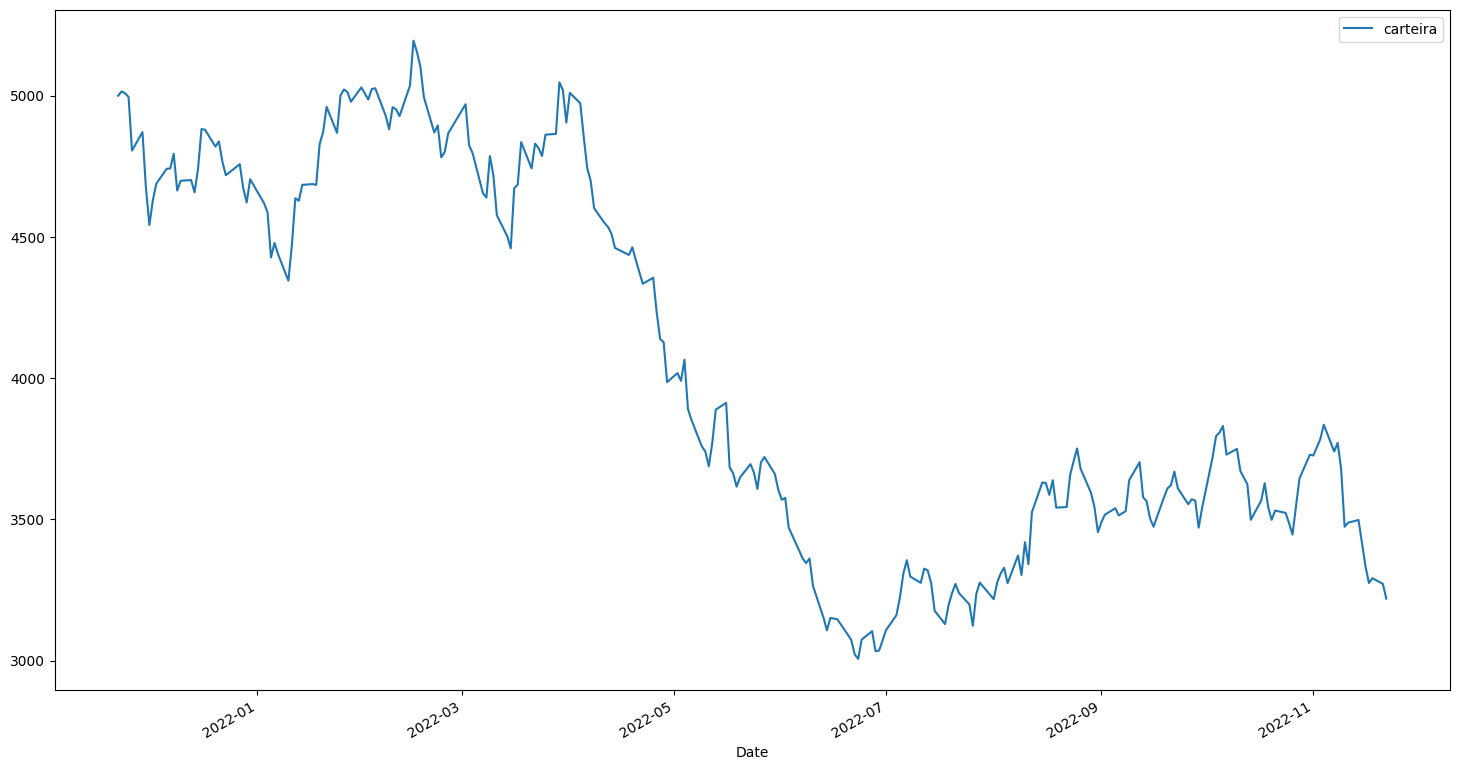

In [22]:
carteira_ativos['saldo'].plot(figsize=(18,10), label= "carteira")
plt.legend()

In [23]:
df_ibov.info

<bound method DataFrame.info of                 Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2009-01-02   37550.0   40265.0   37550.0   40244.0    40244.0   1055200
2009-01-05   40243.0   41889.0   39526.0   41519.0    41519.0   1909200
2009-01-06   41520.0   42363.0   41520.0   42312.0    42312.0   1791000
2009-01-07   42308.0   42308.0   40563.0   40820.0    40820.0   1383600
2009-01-08   40819.0   41991.0   40251.0   41991.0    41991.0   1556000
...              ...       ...       ...       ...        ...       ...
2022-10-25  116016.0  116203.0  114626.0  114626.0   114626.0  14727200
2022-10-26  114626.0  114626.0  112577.0  112764.0   112764.0  16088200
2022-10-27  112766.0  116236.0  112765.0  114641.0   114641.0  15530800
2022-10-28  114636.0  114712.0  113336.0  114539.0   114539.0  14392400
2022-10-31  114533.0  116763.0  112113.0  116037.0   116037.0  21637900

[3421 rows x 6 columns]>

In [29]:
df_ibov = pd.read_csv('/Users/juliocarvalho/Desktop/PosMapa/Bolsab3/IBOVDia_10-11-22.csv', sep=';', skiprows=1, index_col=False)
df_ibov.drop(df_ibov.index[-2:], inplace=True)
df_ibov.tail()

,Codigo,Acao,Tipo,Qtde.STeorica,Part.(%)
87,VALE3,VALE,ON NM,4.547.296.398,"15,546"
88,VIIA3,VIA,ON NM,1.576.975.642,"0,206"
89,VBBR3,VIBRA,ON NM,1.114.442.976,"0,959"
90,WEGE3,WEG,ON NM,1.481.593.024,"2,811"
91,YDUQ3,YDUQS PART,ON NM,296.015.511,"0,190"


In [38]:
df_ibov.index

RangeIndex(start=0, stop=92, step=1)

In [35]:
df_ibov.rename(columns={
  'Codigo': 'dodigo',
  'Aodigo': 'acao',
  'Qtde.STeorica': 'qtde_teorica',
  'Part.(%)': 'participacao'
},inplace=True)

In [36]:
df_ibov.describe(include='all')

,dodigo,Acao,Tipo,qtde_teorica,participacao
count,92,92,92,92,92
unique,92,89,17,92,89
top,RRRP3,BRADESCO,ON NM,200.453.863,"0,206"
freq,1,2,59,1,2


In [37]:
df_ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dodigo        92 non-null     object
 1   Acao          92 non-null     object
 2   Tipo          92 non-null     object
 3   qtde_teorica  92 non-null     object
 4   participacao  92 non-null     object
dtypes: object(5)
memory usage: 3.7+ KB


In [40]:
pd.to_numeric(df_ibov['qtde_teorica'])

ValueError: Unable to parse string "200.453.863" at position 0

In [43]:
df_ibov['qtde_teorica'] =df_ibov['qtde_teorica'].str.replace('.', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [44]:
df_ibov['participacao'] = df_ibov['participacao'].str.replace(',', '.').astype(float)

In [45]:
df_ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dodigo        92 non-null     object 
 1   Acao          92 non-null     object 
 2   Tipo          92 non-null     object 
 3   qtde_teorica  92 non-null     float64
 4   participacao  92 non-null     float64
dtypes: float64(2), object(3)
memory usage: 3.7+ KB


In [46]:
df_ibov.loc[df_ibov['participacao'] > 5]

,dodigo,Acao,Tipo,qtde_teorica,participacao
51,ITUB4,ITAUUNIBANCO,PN EJ N1,4.799907e+09,6.315
65,PETR4,PETROBRAS,PN N2,4.566441e+09,5.741
87,VALE3,VALE,ON NM,4.547296e+09,15.546


In [48]:
df_ibov.loc[(df_ibov['participacao'] > 2) & (df_ibov['participacao'] < 5)]

,dodigo,Acao,Tipo,qtde_teorica,participacao
2,ABEV3,AMBEV S/A,ON,4.386653e+09,3.379
7,B3SA3,B3,ON NM,5.901731e+09,4.204
12,BBDC4,BRADESCO,PN EJ N1,5.156077e+09,3.699
14,BBAS3,BRASIL,ON NM,1.420731e+09,2.461
31,ELET3,ELETROBRAS,ON N1,1.447696e+09,3.275
50,ITSA4,ITAUSA,PN N1,4.736060e+09,2.251
54,RENT3,LOCALIZA,ON NM,8.939782e+08,2.935
64,PETR3,PETROBRAS,ON N2,2.684385e+09,3.771
90,WEGE3,WEG,ON NM,1.481593e+09,2.811


In [49]:
df_ibov['participacao'] > 5

0     False
1     False
2     False
3     False
4     False
      ...  
87     True
88    False
89    False
90    False
91    False
Name: participacao, Length: 92, dtype: bool

In [51]:
df_ibov.iloc[[87, 88]]

,dodigo,Acao,Tipo,qtde_teorica,participacao
87,VALE3,VALE,ON NM,4.547296e+09,15.546
88,VIIA3,VIA,ON NM,1.576976e+09,0.206


In [53]:
df_estatistica = df_ibov.describe(include='all')
type(df_estatistica)

pandas.core.frame.DataFrame

In [55]:
import sqlite3 as sql


conexao = sql.connect('Mapab3.db')
df_estatistica.to_sql('df_estatistica', conexao)

11

In [56]:
df_ibov.to_sql('ibov', conexao, if_exists='replace')

92